Note: Code snippets and notes are based on "Containerization and Virtualization with Docker and Kubernetes" track from DataCamp. Also some contents are AI generated.

# Part 1: Using Docker Containers


## Running Docker Containers
### The Docker CLI
The Docker command line interface or CLI allows us to send instructions to the Docker daemon, which manages containers and images. The basic command is docker. To start a container, we need an image, which acts as a blueprint defining what will be available in the container.

### Docker container output
If we want to start a container from an image, we can use the docker run command, followed by the image-name. To start the hello-world image, we would use docker run hello world. By default, Docker starts a container and shows you its output while it's running.

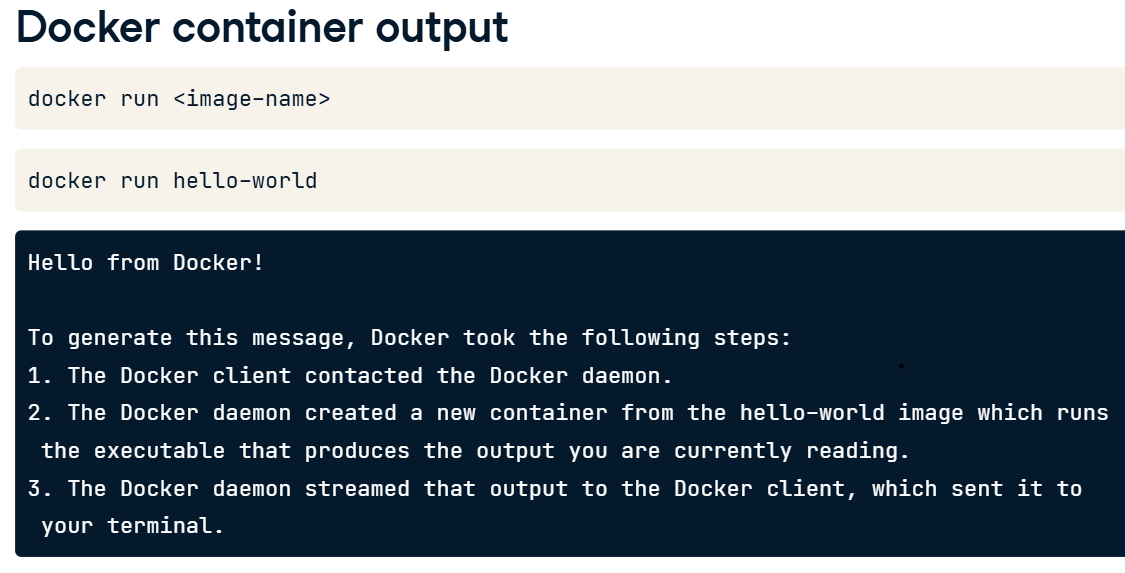

### Choosing Docker container output
When an image is created, the creator can choose what happens when a container is started from the image. For example, the creators of the hello-world image chose to print out text and then make the container stop itself. Another example is the Ubuntu image. When starting an Ubuntu container, it will start and then shut down immediately without printing any output.

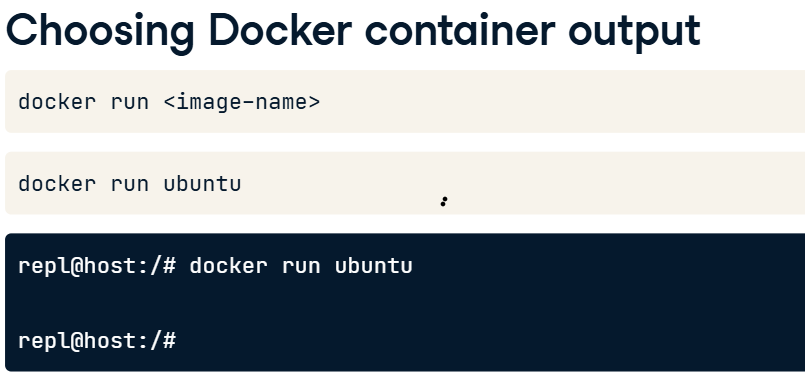

### An interactive Docker container
Using 'docker run dash it' followed by an image-name, we can start a container and simultaneously get an interactive shell in this container. If we do this with the Ubuntu image, we get a new shell inside the new container. The shell gives us access to a clean Ubuntu environment isolated from our host machine because it runs inside the container. Once we want to exit the container, we simply use the exit command, which returns us to the host machine and then stops the container.

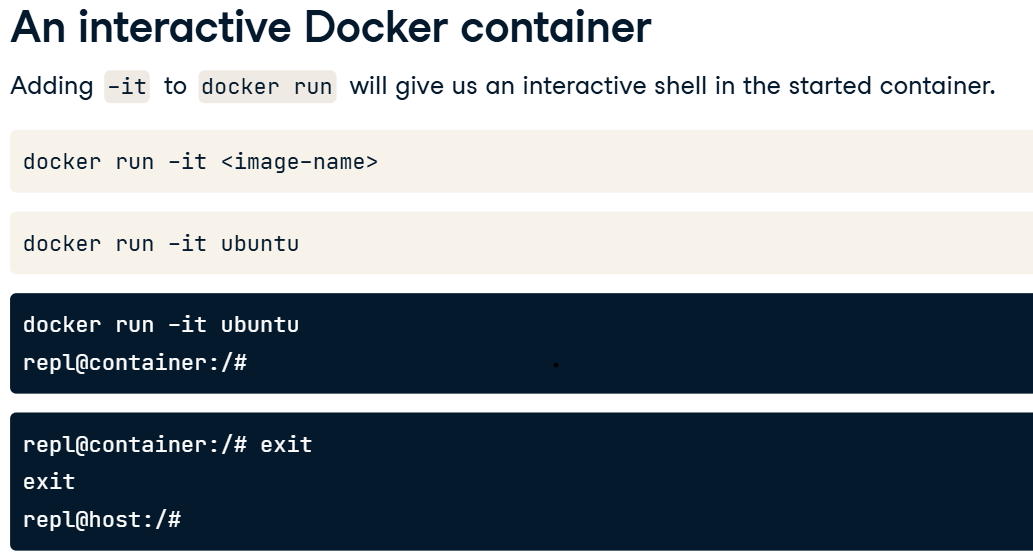

### Running a container detached
A third type of container processes data or can be interacted with in some way externally, for example, a container with a database like Postgres. These are run using Docker run dash d, for detached, followed by the image-name. These containers run in the background without printing their output to our shell.

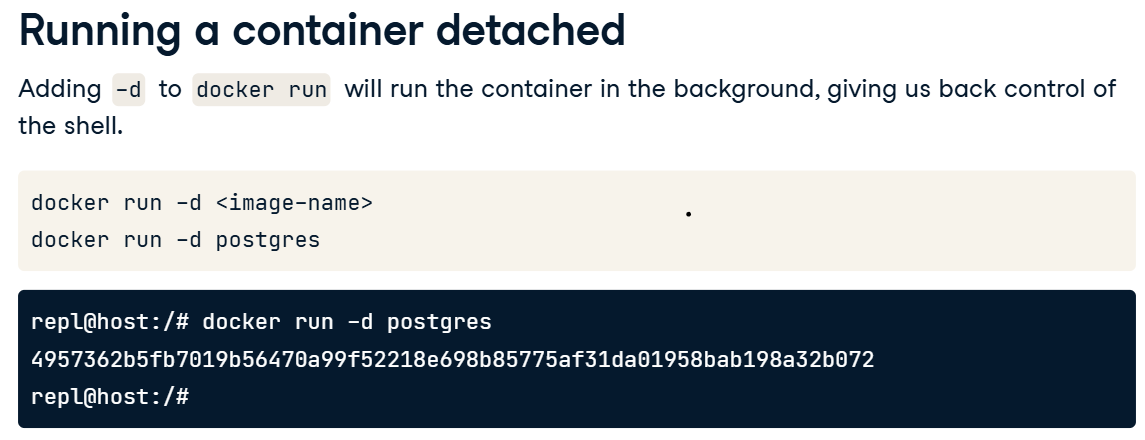

### Listing and stopping running containers
The docker ps command allows us to see any running containers. The first column contains the container-id, uniquely identifying each container. The' docker stop' command can be used to stop containers we no longer need.

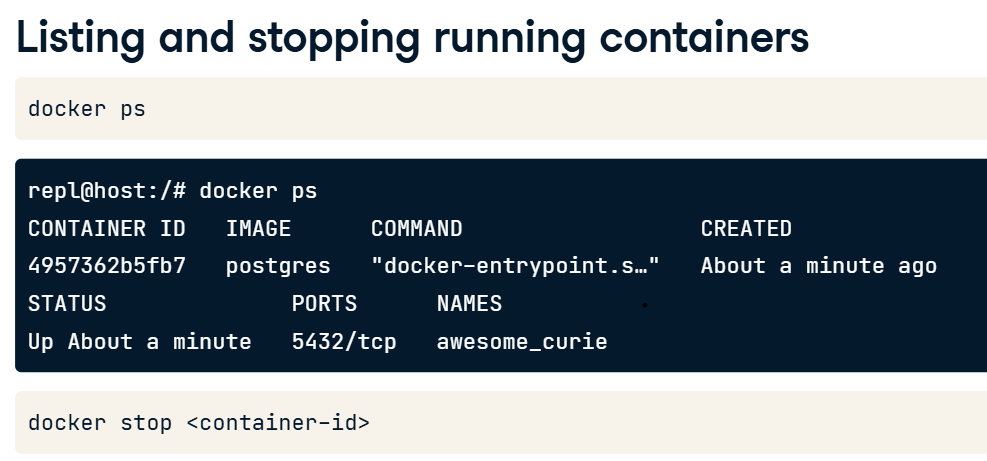

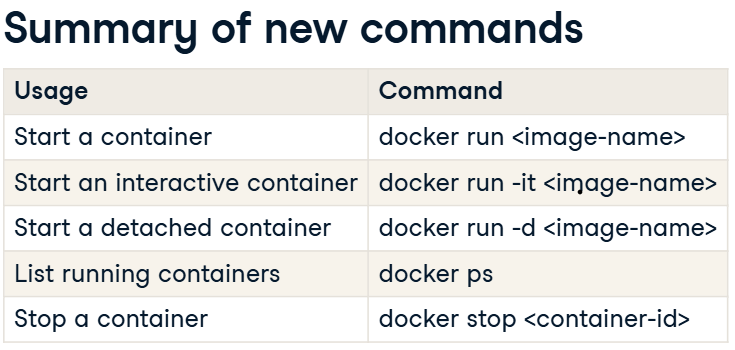

## Working with containers

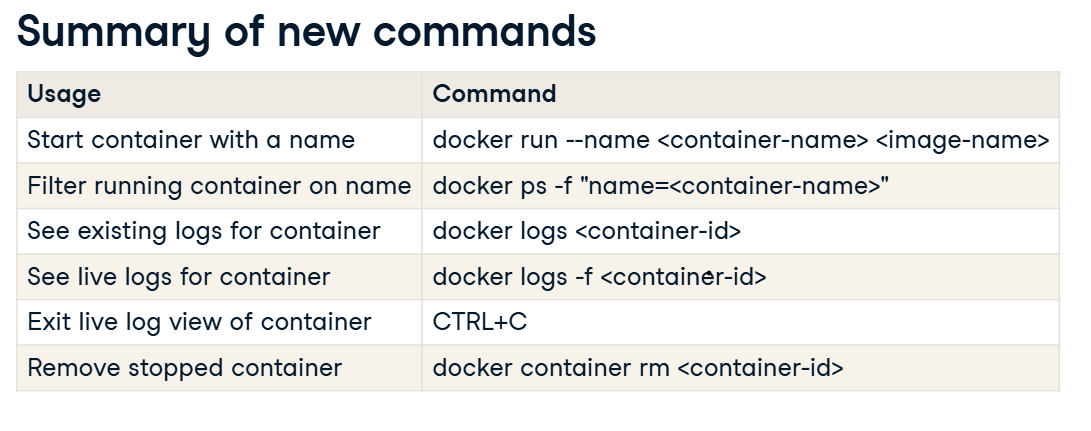

| **Command**                                        | **Description**                                           |
| -------------------------------------------------- | --------------------------------------------------------- |
| `docker run [OPTIONS] IMAGE`                       | Create and start a new container from an image            |
| `docker ps`                                        | List running containers                                   |
| `docker ps -a`                                     | List all containers (including stopped ones)              |
| `docker start [CONTAINER]`                         | Start a stopped container                                 |
| `docker stop [CONTAINER]`                          | Stop a running container                                  |
| `docker restart [CONTAINER]`                       | Restart a container                                       |
| `docker rm [CONTAINER]`                            | Remove a container                                        |
| `docker logs [CONTAINER]`                          | View the logs of a container                              |
| `docker exec -it [CONTAINER] [COMMAND]`            | Run a command in a running container (e.g., open a shell) |
| `docker inspect [CONTAINER]`                       | Get detailed information about a container                |
| `docker top [CONTAINER]`                           | Show running processes inside a container                 |
| `docker attach [CONTAINER]`                        | Attach your terminal to a running container               |
| `docker update [OPTIONS] [CONTAINER]`              | Update configuration of a container                       |
| `docker rename [OLD_NAME] [NEW_NAME]`              | Rename a container                                        |
| `docker cp [CONTAINER]:/path/to/file ./local/path` | Copy files from container to host (or vice versa)         |


## Managing Local Docker Images

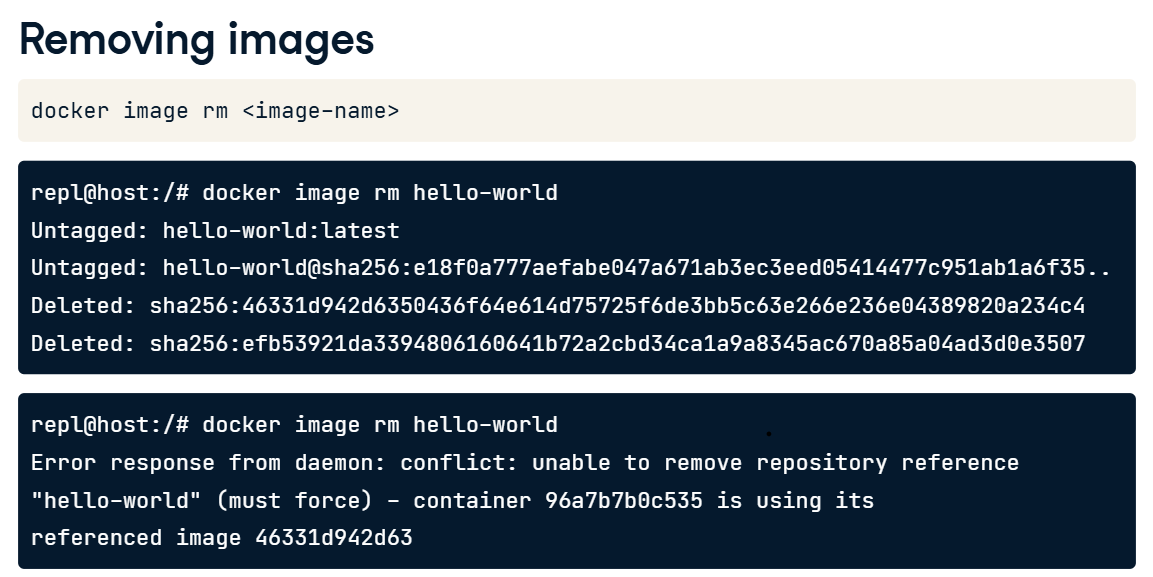

A container is a running image; a side effect of this is that you can only delete an image once there are no more containers based on it. If we try to delete an image for which we still have a container on our system, we'll get the warning.

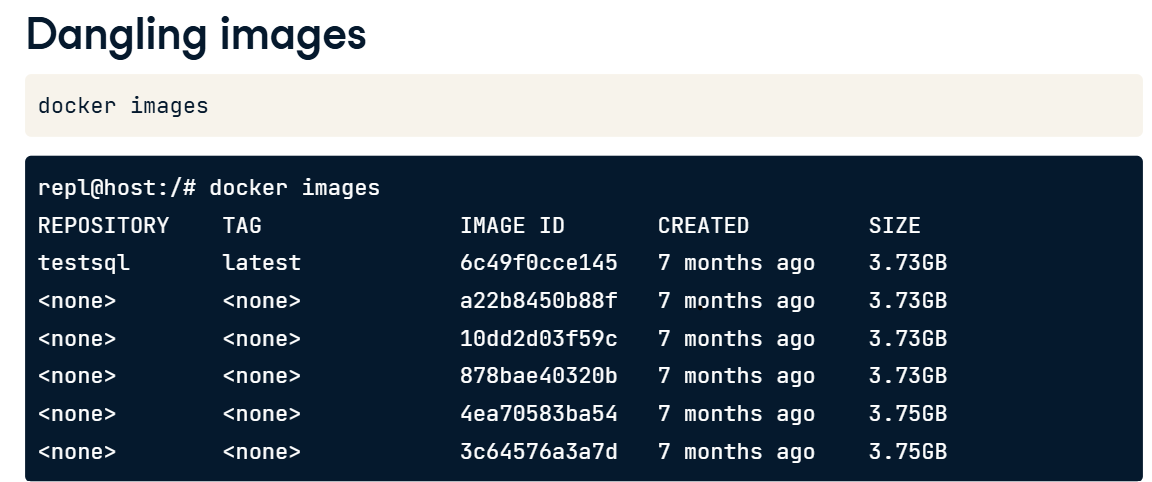

A dangling image is an image that no longer has a name because the name has been re-used for another image. This frequently occurs when creating our own images. For example, if we create an image called testsql, but we find a mistake and change our image slightly, the previous testsql image will then become dangling as our new fixed image now has the testsql name.

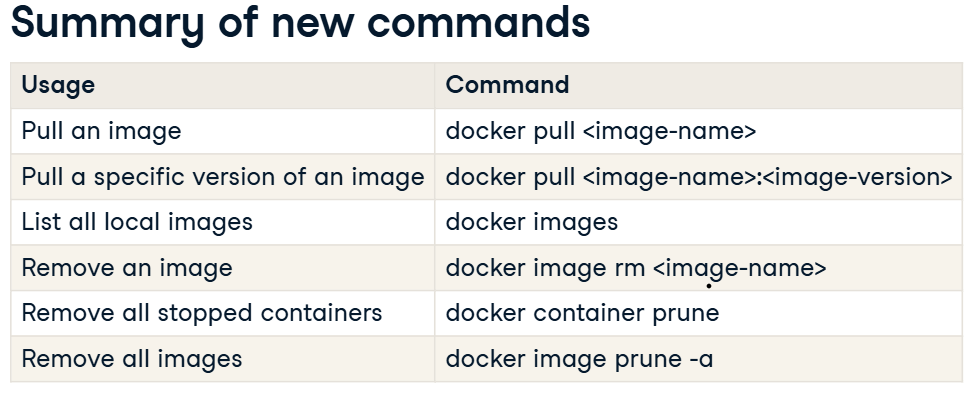


| **Command**                                    | **Description**                                           |
| ---------------------------------------------- | --------------------------------------------------------- |
| `docker images`                                | List all local Docker images                              |
| `docker build -t [NAME:TAG] .`                 | Build an image from a Dockerfile in the current directory |
| `docker tag [SOURCE_IMAGE] [TARGET_IMAGE:TAG]` | Add a new tag to an image                                 |
| `docker rmi [IMAGE]`                           | Remove a local image                                      |
| `docker image prune`                           | Remove unused images (dangling)                           |                           |
| `docker load -i [FILE.tar]`                    | Load an image from a tar archive                          |
| `docker inspect [IMAGE]`                       | View detailed info about an image                         |
| `docker history [IMAGE]`                       | Show the history of an image’s layers                     |
| `docker search [TERM]`                         | Search Docker Hub for images matching a term              |


# Part 2: Writing your own docker images

## Distributing docker images
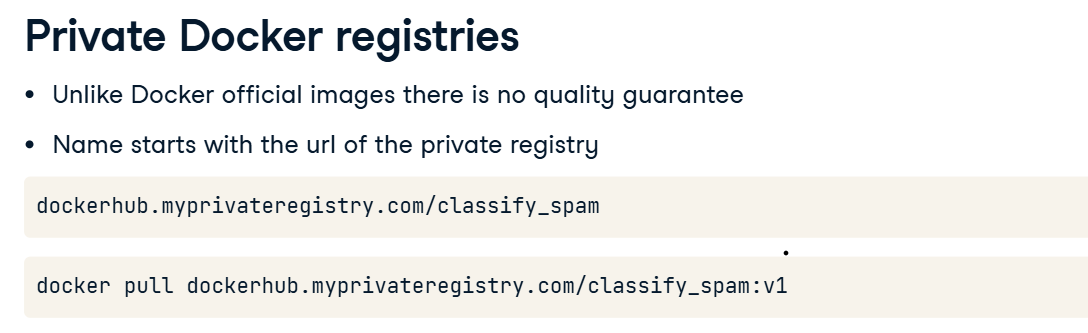

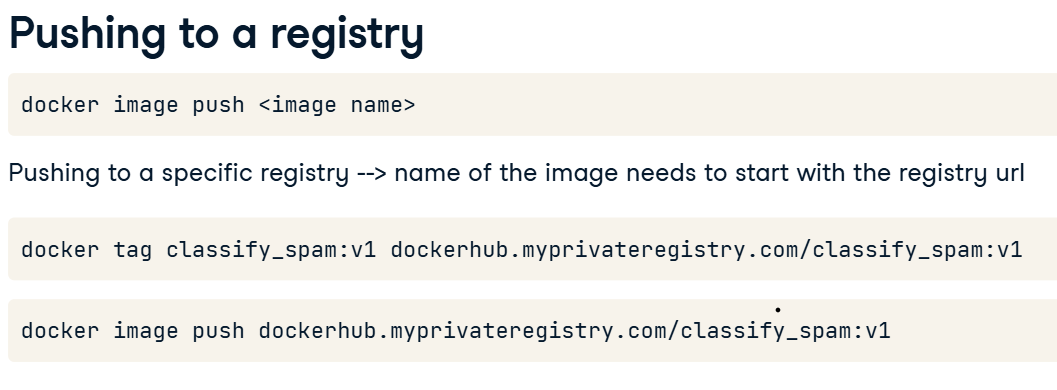

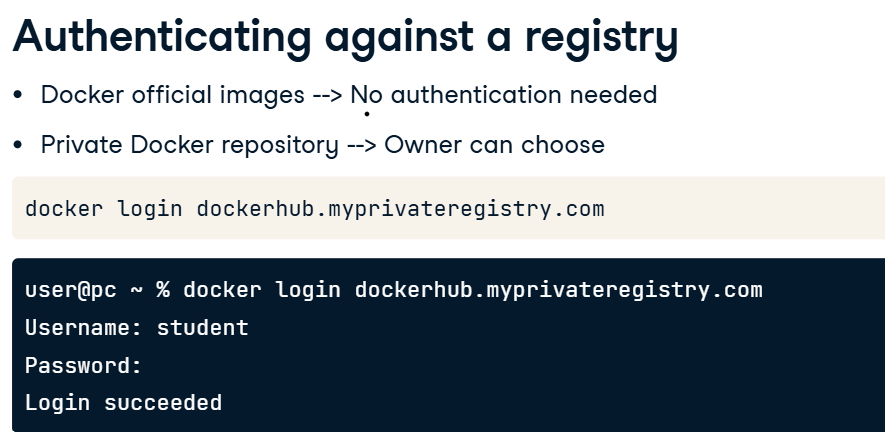

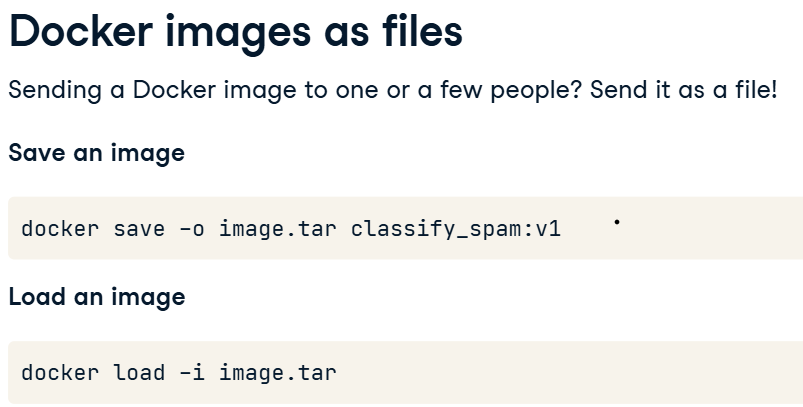

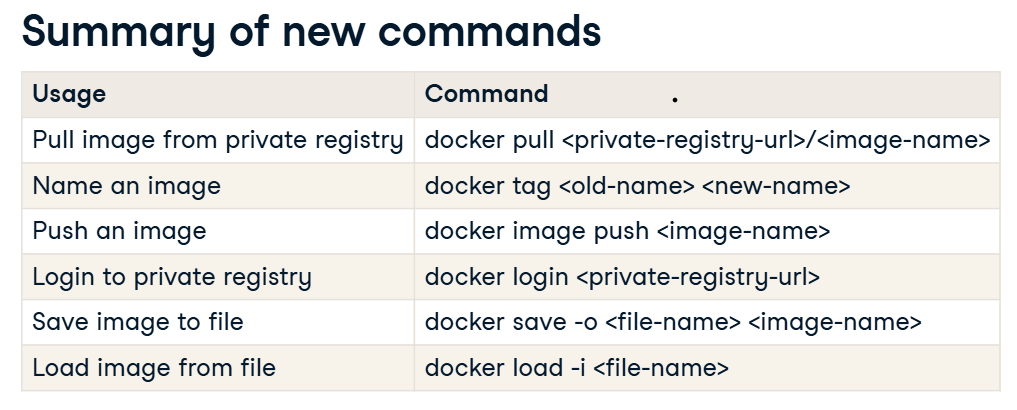

## Creating our own docker images
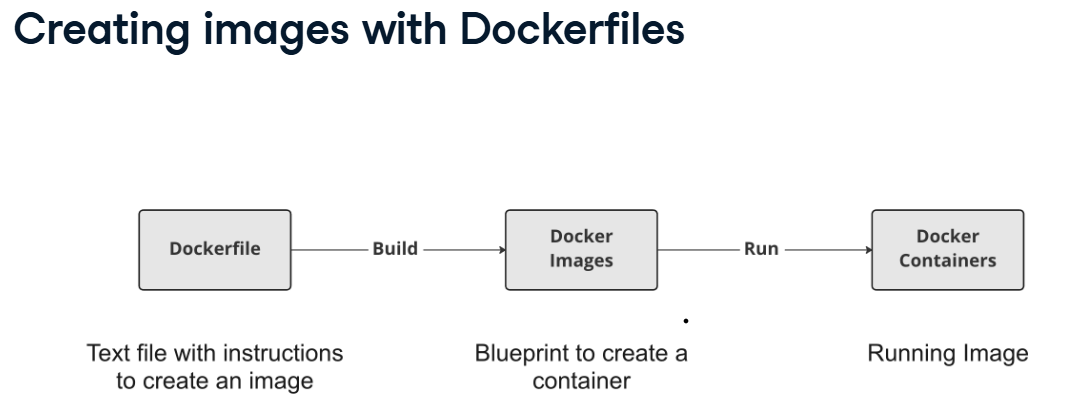

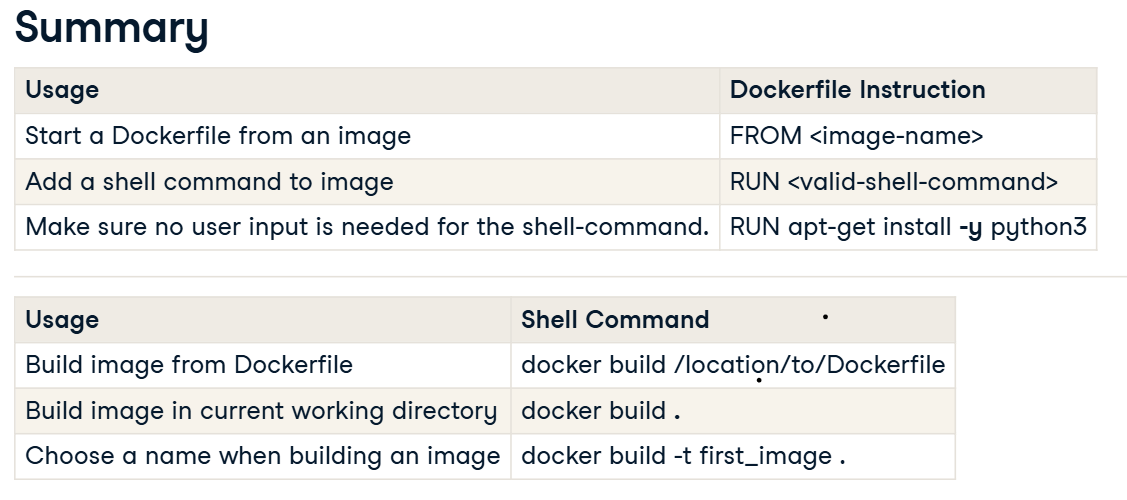

## Managing files in your image
The RUN instruction allowed us to execute bash commands to create an image, but we can't use it to move files from our local file system onto the image we're building. To copy local files to our image we use the COPY instruction. The COPY instruction needs two parameters: first, we pass to it the path of the file we want to copy, including the name of the file we want to copy. The second parameter is the destination path inside the image. We can choose whether to end the destination path with a filename. If we do not pass a filename, the file will get its original name.

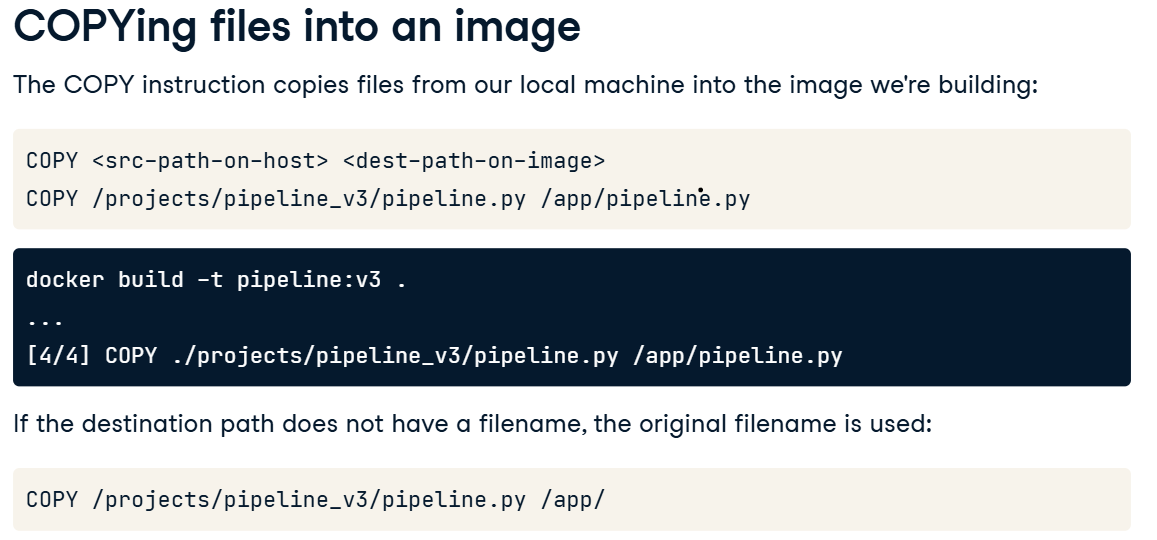

If we don't specify a filename in the source path, then instead of just a single file, the entire contents of the folder will be copied, including sub-folders. 

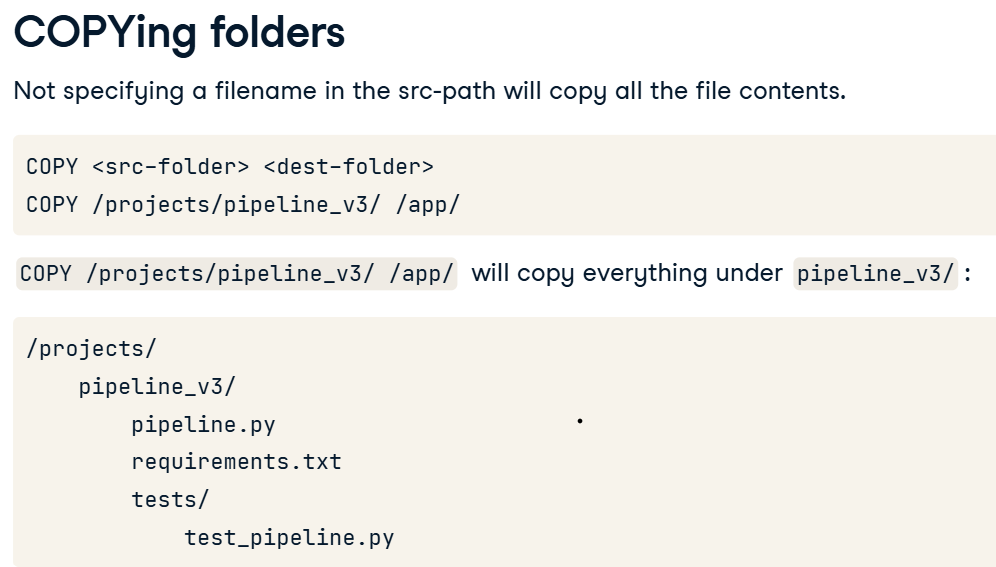

It is not possible to copy files from a parent directory when building a Dockerfile.

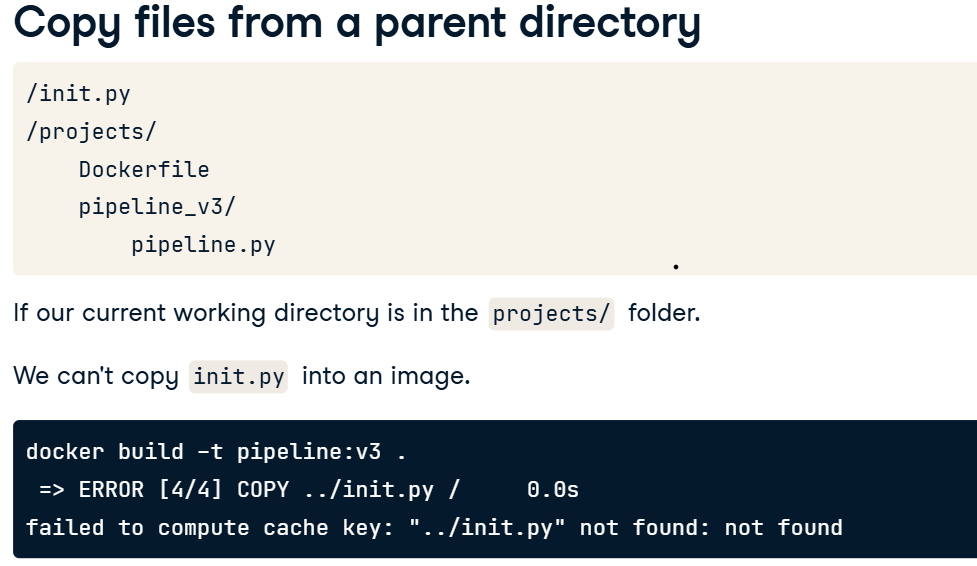

Another common way to include files in an image is to download them during the image build. While there is an instruction that allows us to do this, the ADD instruction, best practice is to use several RUN instructions and bash commands to download and unzip files. First, use curl to download a file to a local directory. Then unzip it using the unzip command if it is an archive. Finally, once we don't need the zip file anymore, we can remove it with the rm command.

Any instruction in a Dockerfile that downloads files will add to the size of the image. Even if the files are removed in a later instruction. To ensure images don't become unnecessarily big, we should download, unzip and remove the original file in a single RUN instruction.

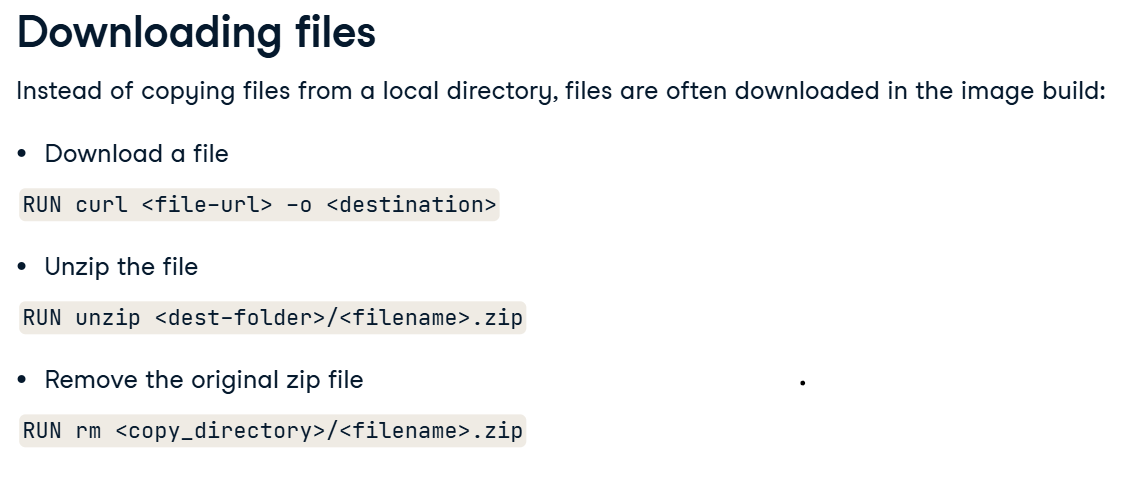

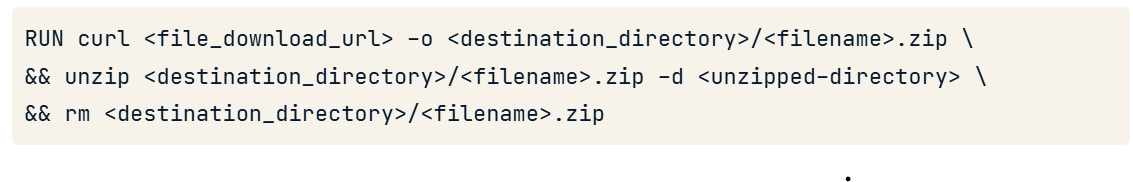


## Choosing a start command for our Docker image

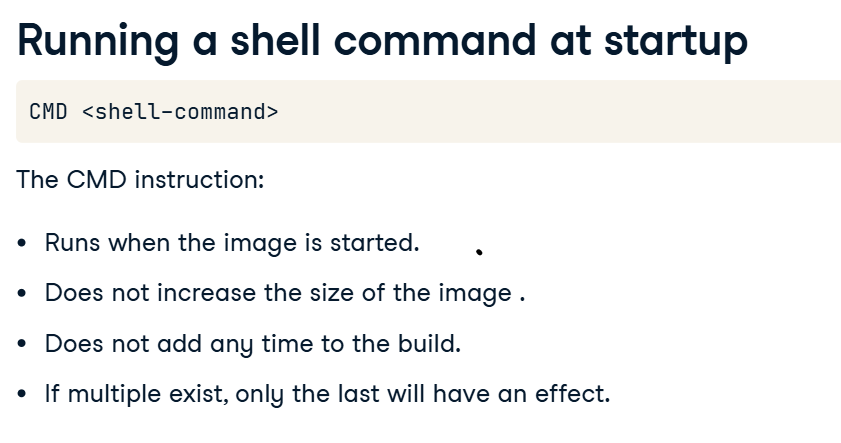

The shell command runs when somebody starts a container; it is not executed when using docker build to create an image from the Dockerfile.

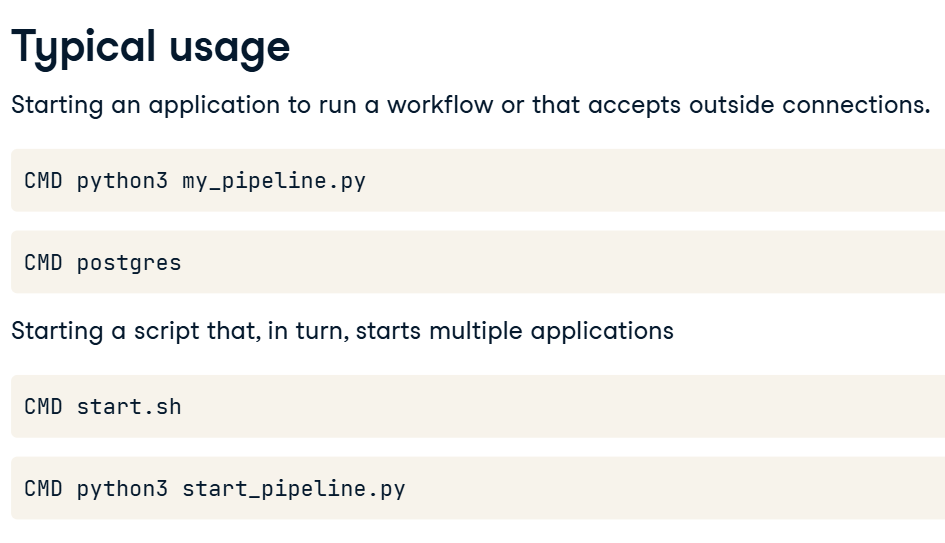

### Overriding the default start command
While the CMD instruction sets a default start command for the image, this default start command can be overridden when starting an image using the Docker run command. Just like we pass the image we want to start to Docker run, we can pass a second optional argument, which will override the CMD instruction set in the image. 

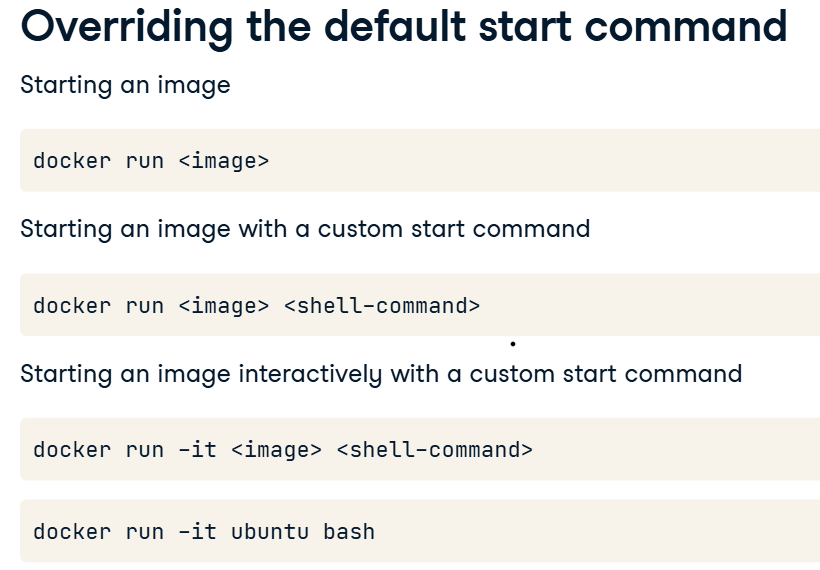

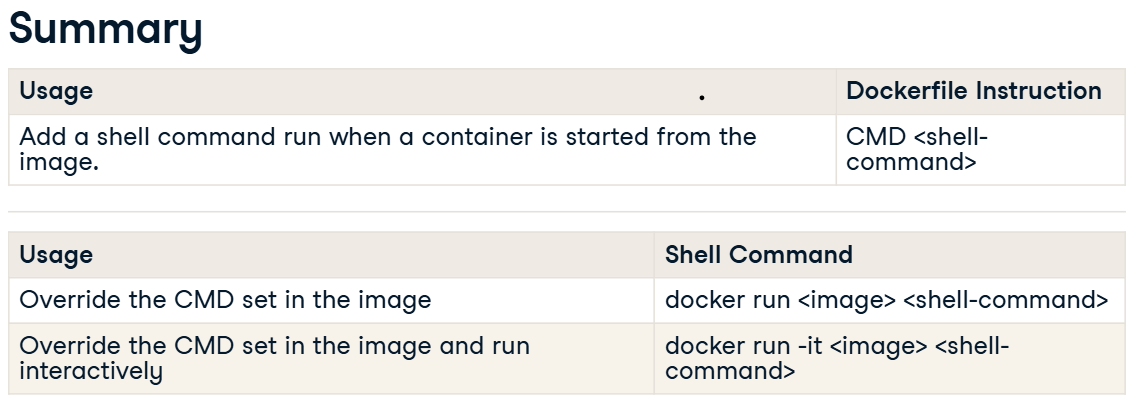

# Part 3: Creating Secure docker images

## Introduction to docker caching
Building Dockerfiles can take some time. However, building the same Dockerfile a second time is much faster. 

When learning about the RUN instruction, we saw that building images can take significant time because the shell commands are actually run when the image is built. This is necessary because what is saved in the resulting image is not the instructions in the Dockerfile but the changes in the file system the instructions make during the build. For example, if we have a RUN instruction with a shell command that downloads and opens a zip file with several files inside, the resulting image will contain those files.

During the build, an image keeps track of which instructions in the Dockerfile created which change to the file system. We can view an image as a list of consecutive changes to the file system, with every entry in the list corresponding to a specific Docker instruction in the Dockerfile.

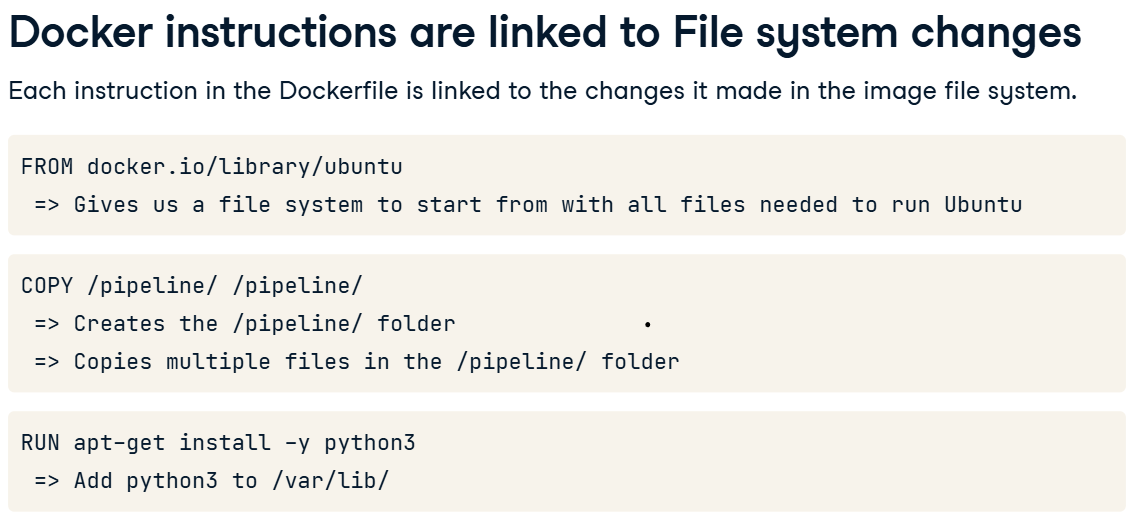

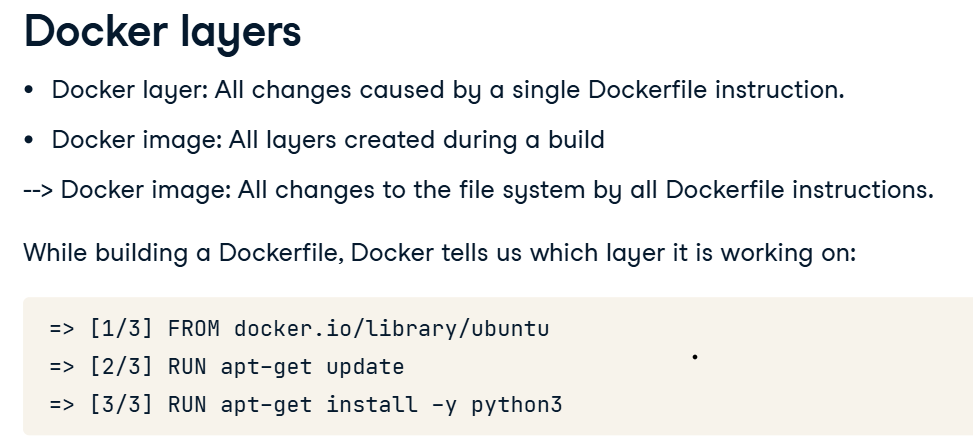

### Docker caching
When building a Dockerfile that we have built before, in front of each layer being built, it says cached in capital letters. Docker detects which Dockerfile instructions have not changed, and instead of re-running the Dockerfile instruction, it uses the known result it has stored. Docker will only use cached layers to speed up our builds if the Dockerfile instruction is exactly the same and all previous Dockerfile instructions are also identical to when it originally created and stored this layer.

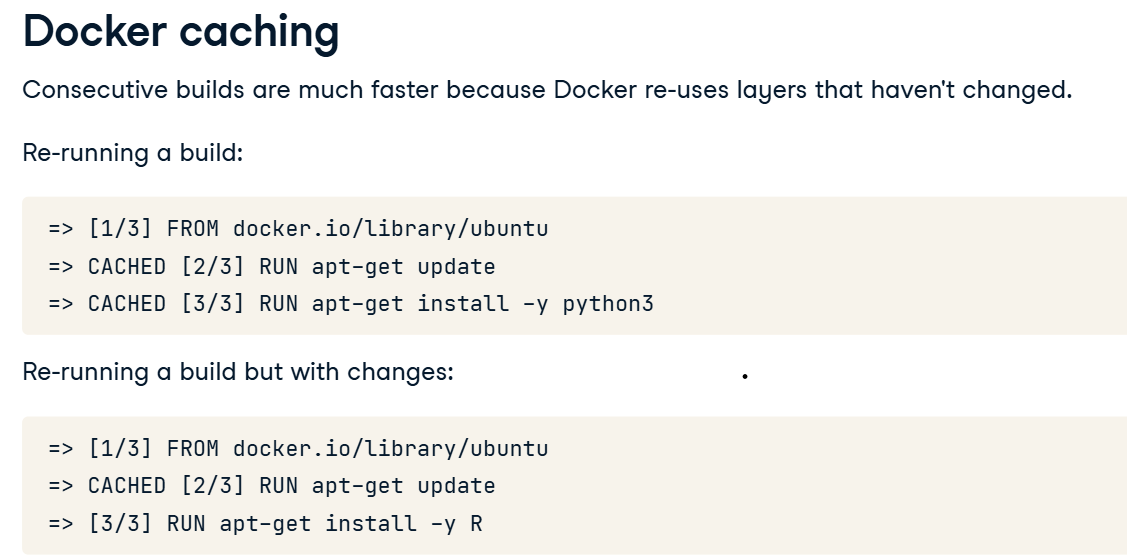

Understanding when Docker layers are cached when building images is important for two reasons. First, it will help us understand why sometimes our image stays the same even though we change and rebuild it. For example, if we have a RUN 'apt-get update' and 'apt-get install python3' instruction in our Dockerfile, and a new version of python3 is released. Rebuilding our Dockerfile will not change anything in the resulting image. Docker will see the same instructions as when it last built this Dockerfile and will assume that the result is the same. It can not know that re-running apt-get update will give another result.

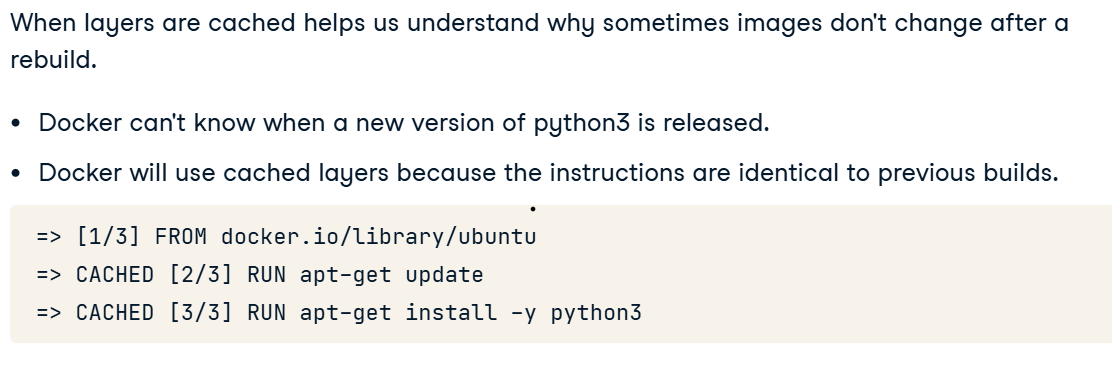

Understanding when Docker layers are cached is also important because it will help us write Dockerfiles, which we can make changes to without all layers having to be rebuilt. 

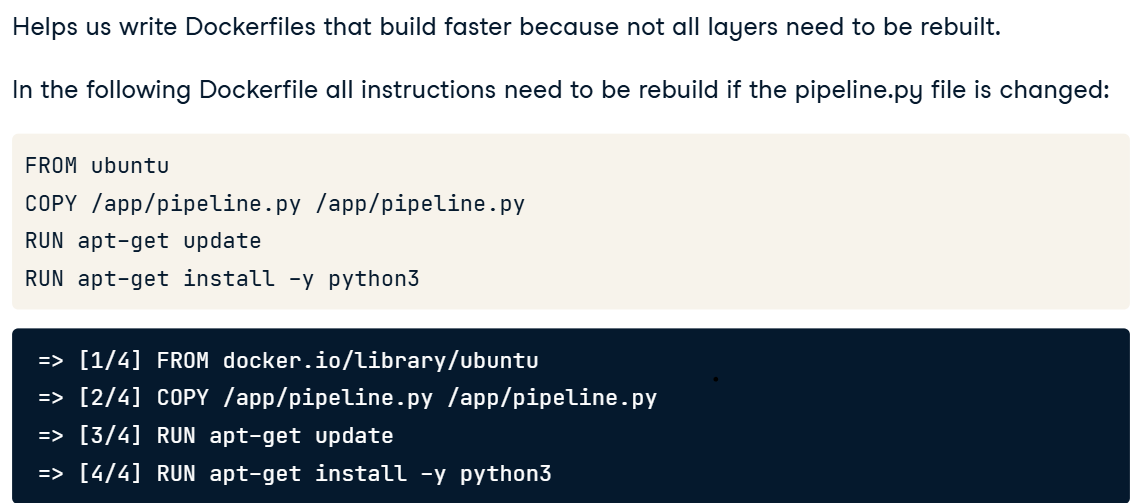

This is why we always want to put the Dockerfile instructions to install packages before instructions to copy files into the image. Often we'll change the files when improving our work or fixing bugs, but the packages we need rarely change. This ensures as many cached layers as possible can be re-used.



### 🧱 Rule: Layer caching is linear and sequential
When Docker builds:

It checks if a layer's instruction and inputs match a cached one.

If yes → it reuses the cached layer.

If no → it rebuilds that layer, and all layers after it.

📌 Once a layer changes, Docker cannot reuse anything after it. (It is true for almost all cases with some caveats)

### One of the limitation of caching in docker:
RUN apt-get update && apt-get install python3

If a new python3 version is released, but your Dockerfile hasn't changed, Docker will use the cached layer.

Docker doesn’t know that apt-get update now fetches newer packages, so it won’t automatically rebuild that layer.  

Why?  
Docker’s cache is based on:  

The Dockerfile instruction itself (text of the command),

The inputs (files copied in previous steps),

Not the external state like package repositories.  

Summary  
Docker caches layers based on instructions and input files, not external state.

Package updates won’t trigger rebuilds unless you force it.

Use --no-cache or build arguments to bust cache when you want fresh packages.


## Changing Users and working diretory
### Dockerfile instruction interaction
The FROM, RUN, and COPY instructions only affect the file system, not each other. If we copy a start.sh file from our local file system into an image, we can then use the RUN instruction to execute this file. The two instructions didn't change each other's behavior directly, but both used and changed the file system. However, some instructions can influence other instructions directly. The WORKIDR instruction changes the working directory instructions are executed in, and the USER instruction changes which user is executing the following instructions.

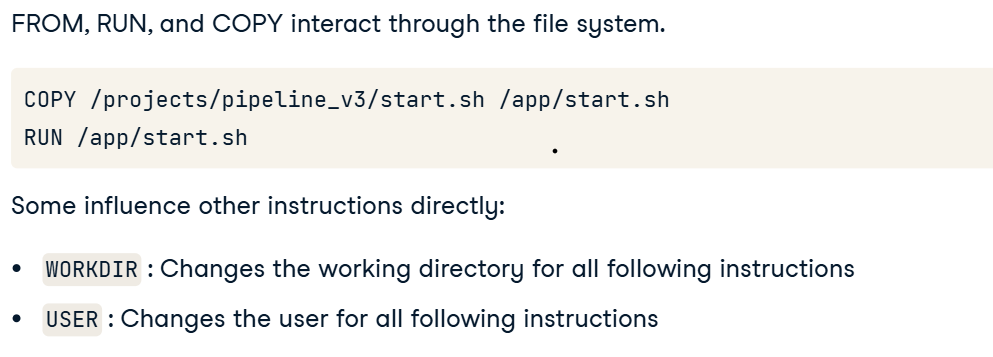

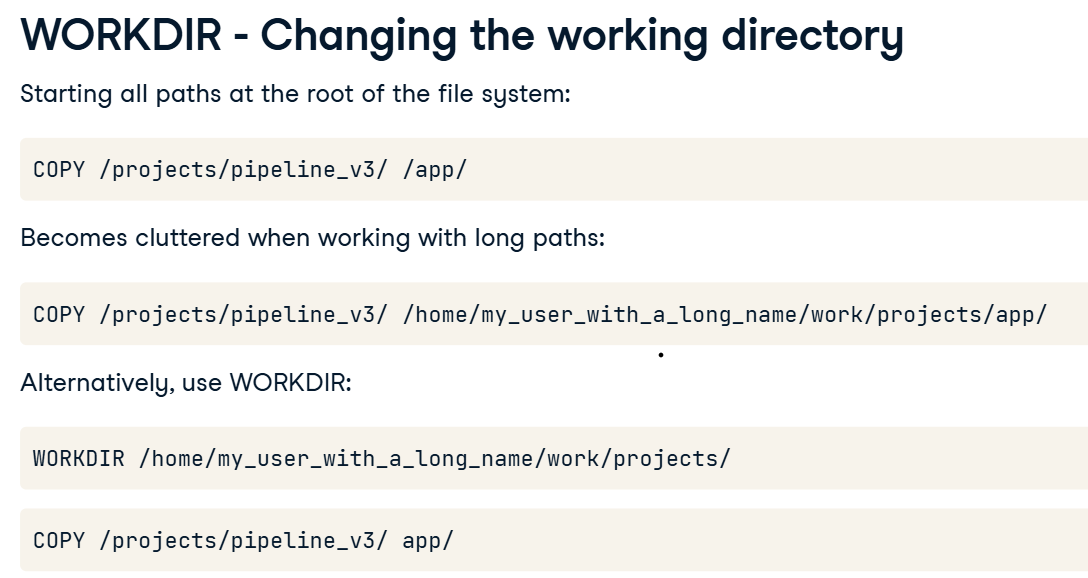

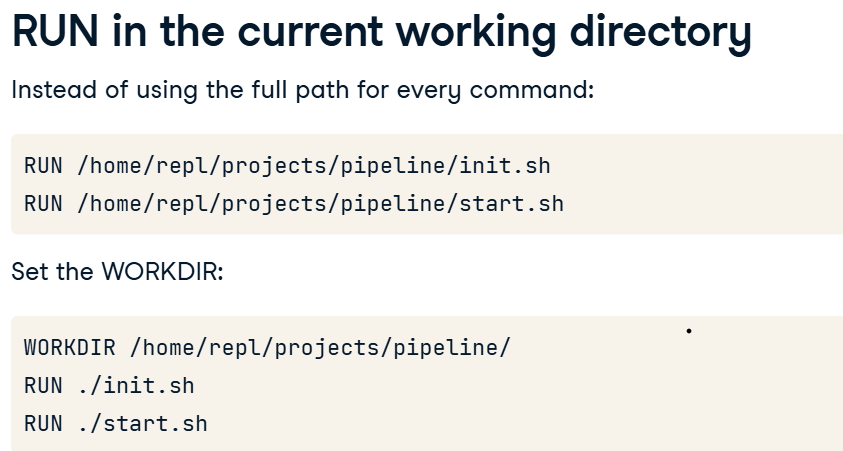

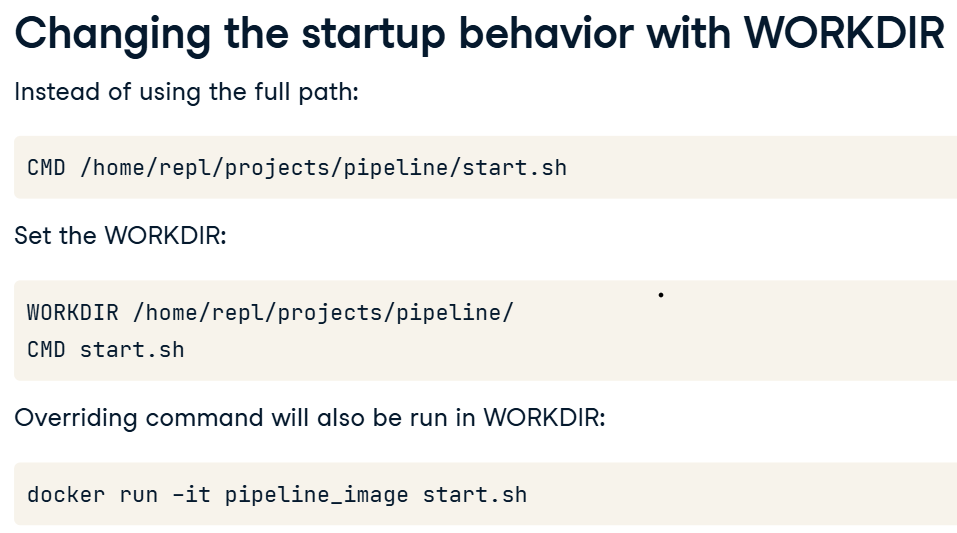

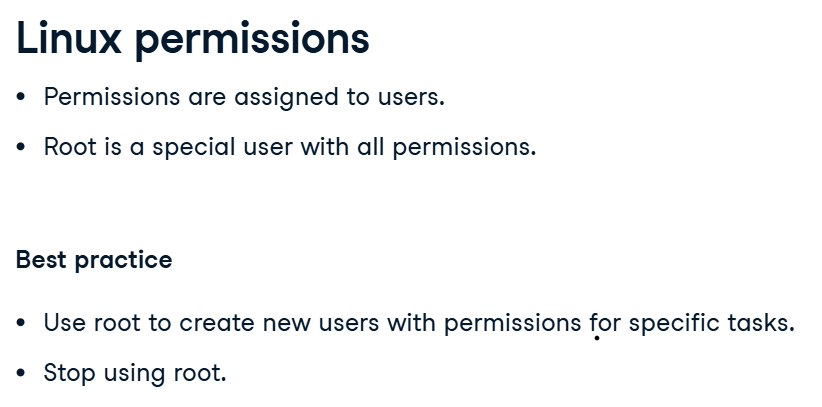

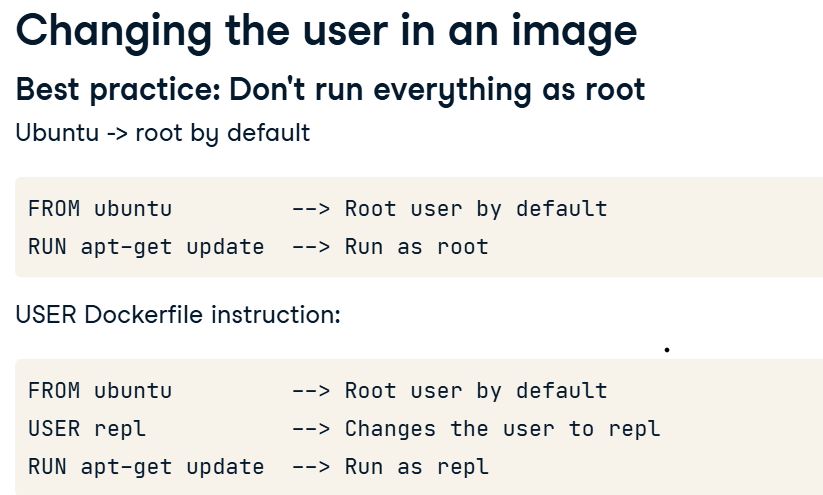

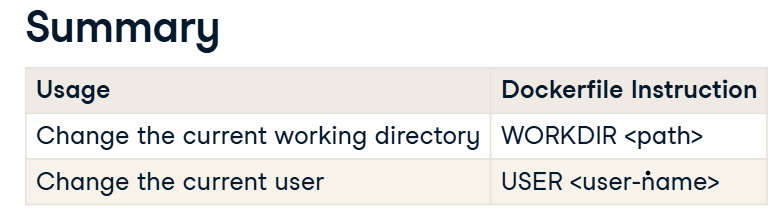